# k-Nearest Neighbors

**k-Nearest Neighbors** (kNN) is a simple, yet powerful algorithm that can be used to solve classification problems. 

The core idea is that inputs should be classified with other inputs that have similar features.

## The Algorithm

<img src='KVisual.png' width="300" height="300">
<center> Image from: https://www.mdpi.com/2076-3417/8/1/28 </center>

The procedure for classifying an input $X$ for any general problem is as follows:
1. Pick a value of $k$. Note: You can choose any value for $k$. What works best varies from data set to data set, which can be determined by trial and error. 
2. Find the $k$ nearest neighbors to your input, according to your distance metric.
3. Count the number of neighbors in each category.
4. Categorize the input based on the majority. 

Note: kNN has $O(1)$ training time! This is because there is no training. (Think about why)

### Checkpoint
1. In the figure above, what would the $?$ be categorized as when $k = 3$?
2. What about when $k = 11$?

**Your Answers Here**   
1.  
2.  

## Implementation Time :) 

Now that we've gone over the bare bones of kNN, you guys get to implement it yourselves!

Before we jump into coding we'll introduce you to the data we'll be looking at. 

### The Dataset

<img src='iris.jpg' width="250" height="250">
<center> Image from: A Complete Guide to K-Nearest-Neighbors by Zakka </center>

The dataset we'll be using is the [Iris Flower Dataset](https://archive.ics.uci.edu/ml/datasets/Iris). It contains a series of observations on three species of Iris (Iris setosa, Iris virginica, and Iris verisolor). Each observation contains four features: the *petal length, petal width, sepal length, and sepal width*. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

np.random.seed(189)

#importing the data
iris = datasets.load_iris()

#y contains the correct classifications (0, 1, 2 for each type of Iris)
y = iris.target 


In [2]:
print("Iris Dataset (plength, pwidth, slength, swidth)")
print(iris.data[:9, :])

Iris Dataset (plength, pwidth, slength, swidth)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]]


### Code it up
The following helper functions will be useful!


In [3]:
#Returns the Euclidian distance between two iris data points.
def distance(x1, x2):
    #print("finding dist btwn:", x1, x2)
    for i in range(len(x1)):
        sq_diff = np.square(x1-x2)
    return np.sum(sq_diff)

#Returns a numpy array containing the classifications of the k closest data points
#k is the number of neighbors, iris is the input we are trying to classify
#irisData is the training dataset, and y contains the classifications for the training dataset
def getKClosestClassifications(k, iris, irisData, y):
    distances = []
    
    #Get the distance from iris to every single classified iris
    for i in range(irisData.shape[0]):
        ##print("i", i)
        dist = distance(irisData[i], iris);
        ##print("dist", dist)
        distances.append((dist,i))
        
    #Sort the array of distances
    distances = sorted(distances,key = lambda x:x[0])
    ##print(distances)
    
    #Get the indicies of the k closest irisis
    indicies = [x[1] for x in distances[:k]]
    
    return [y[i] for i in indicies]

**Now it's your turn!**

In [4]:
'''Write a function (irisKNN) that takes in parameters: 
     - k 
    - iris (the input to be classified)
     - data (the training dataset)
     - y (the classifications for the training dataset)

     
    And returns 0, 1, or 2 as the kNN classification of iris
     
    *Note the following functions may be useful
        - getKClosestClassifications(k, iris, irisData, y)
            => returns a list containing the classifications [0, 1, or 2] 
                for each of the k closest data points to iris
        - lst.count(x)
            => returns the count of value 'x' in list 'lst'
'''

def irisKNN(k, iris, data, y):
    #YOUR CODE HERE #TO REMOVE
    k_class = getKClosestClassifications(k, iris, data, y)
    return max(k_class, key=k_class.count)
        

Check your implementation

In [5]:
sol0 = irisKNN(100, iris.data[3], iris.data, y)
sol1 = irisKNN(3, iris.data[65], iris.data, y)
sol2 = irisKNN(9, iris.data[125], iris.data, y)

print("Expected: " + str(y[3]) + " kNN: "+ str(sol0))
print("Expected: " + str(y[65]) + " kNN: "+ str(sol1))
print("Expected: " + str(y[125]) + " kNN: "+ str(sol2))


Expected: 0 kNN: 0
Expected: 1 kNN: 1
Expected: 2 kNN: 2


**Congrats! You've now implemented kNN.**

But you may have some questions. _What happens when the dataset is really really huge? What if the Euclidian distance isn't the best way to classify how close two points are? And last but not least, how do you chose a value for k?_

We'll start by briefly answering the first two.   

The prediction time for kNN is $O(n)$, which is much slower than something like linear regression, where teh prediction is $O(1)$. This is just one of the drawbacks of kNN which is known to be really computationally expensive.  

The distance function can actually be customized and designed to suit your particular dataset. For example, say you're classifying something based on features f1 and f2, where f1 is much more important than f2. In that case you can adjust accordingly by weighting the distance between the two f1 values much higher than distance between the two f2 values.  

As for the value of $k$, $k$ is something we pick depending on the model we are trying to build. You can kind of think of choosing k as turning a knob and seeing which produces the best results (trial and error). We'll delve deeper into the affect $k$ has on the bias and variance of the model in a bit.




## Decision Boundaries

If we've chosen a value for $k$, we can imagine the **decision boundaries** associated with our model. 

The picture below shows the boundary between the blue and yellow points.

<img src='decisionBoundary.png' width="300" height="300">
<center> Image from: "The Elements of Statistical Learning, by Hastie, Tibshirani, and Friedman.  </center>

The decision boundaries divide our feature space into sections that would be assigned the same classification. So any inputs that fall within the yellow space or blue space would be classified as yellow and blue respectively.

## Bias Variance with kNN

Now, lets take a look at how our models are affected by the value of $k$.

### A Warm Up

<img src='knn-variance.png' width="700" height="700">
<center> Image from: http://ljdursi.github.io/ML-for-scientists/#1 </center>

For some intuition take a moment to consider these extreme cases: 
> 1. How would our model behave if $k = n$?  
> 2. What if $k = 1$?

**Your Answers Here**
1. 
2. 

And some questions to follow:
> 3. Does $k=1$ or $k=n$ produce more jagged decision boundaries?
> 4. Does this indicate higher or lower variancei within our model?

**Your Thoughts Here**
1. 
2. 

### An Analysis


<img src='knn_k.png' width="900" height="900">
<center> Image from: Classification of Hand-written Digits (3) by DeWilde </center>

**k = 1**  
When $k=1$, our model always picks the closest neighbor and classifies the input respectively. In this case our decision boundaries would be jagged from overfitting to every single detail, and small changes in the training dataset would cause the decision boundary to shift a lot. Since the model will be very different depending on the training data, $k=1$ would create models with **high variance** and **low bias**. 

**k = n**  
On the other hand, when $k = n$, every single input would be categorized as the same. Consider the classification problem in the image above. There are more yellow than purple points, so when $k=n$ we'll always categorize the input as yellow no matter where it's located in our feature space. Because of this, kNN with $k=n$ would result in models that contain **low variance** and **high bias**.

#### tldr;
 - variance **decreases** as $k$ **increases**
 - bias **increases** as $k$ **increases**
 
 
Below is a gif of the decision boundaries evolving as $k$ increases.
<img src="knn.gif" width="60%">


 
### Test Yourself  
Which picture corresponds to high/low values of k?  

![alt text](BiasVariance.jpg "Bias Variance Visualization")

Fill in the blanks  
 ______ increases as k increases  
 ______ decreases as k increases  

## sklearn and kNN

It would be a lot of work to write our own kNN and distance function every time we need it. So here's an example using sklearn's KNeighborsClassifier.

Credit to: https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification 

### Importing Libraries and Preparing the Data

#### Import Libraries

In [6]:
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets

#### Load Dataset

In [7]:
iris = datasets.load_iris()

#y contains the correct classifications (0, 1, 2 for each type of Iris)
y = iris.target 

iris_df = iris.data.copy

#Creating the dataframe
#Note: Here we're converting iris.data (which is a numpy array) into a dataframe
#      If your data is in a csv file, you can directly create a dataframe from that as well
col_names = ['Sepal Length', 'Sepal Width','Petal Length','Petal Width']
iris_df = pd.DataFrame.from_records(iris.data, columns = col_names)
iris_df['Species'] = y


print(iris_df.head())

   Sepal Length  Sepal Width  Petal Length  Petal Width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


#### Summarize the dataset

In [8]:
iris_df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Let’s now take a look at the number of instances (rows) that 
# belong to each class. We can view this as an absolute count.
iris_df.groupby('Species').size()

Species
0    50
1    50
2    50
dtype: int64

#### Dividing the Dataframe into Feature and Labels

In [10]:
feature_columns = ['Sepal Length', 'Sepal Width','Petal Length','Petal Width']
X = iris_df[feature_columns].values
y = iris_df['Species'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

#### Splitting the Data into Train and Test Sets

In [11]:
#Splitting dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Using KNN for classification

In [12]:
#For data visualizations later
import matplotlib.pyplot as plt
import seaborn as sns


#### Making Predicitons

In [13]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#### Evaluating Predictions

In [14]:
cm = confusion_matrix(y_test, y_pred)

#Calculating model accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


#### Using cross-validation for parameter tuning

In [15]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
 

<Figure size 432x288 with 0 Axes>

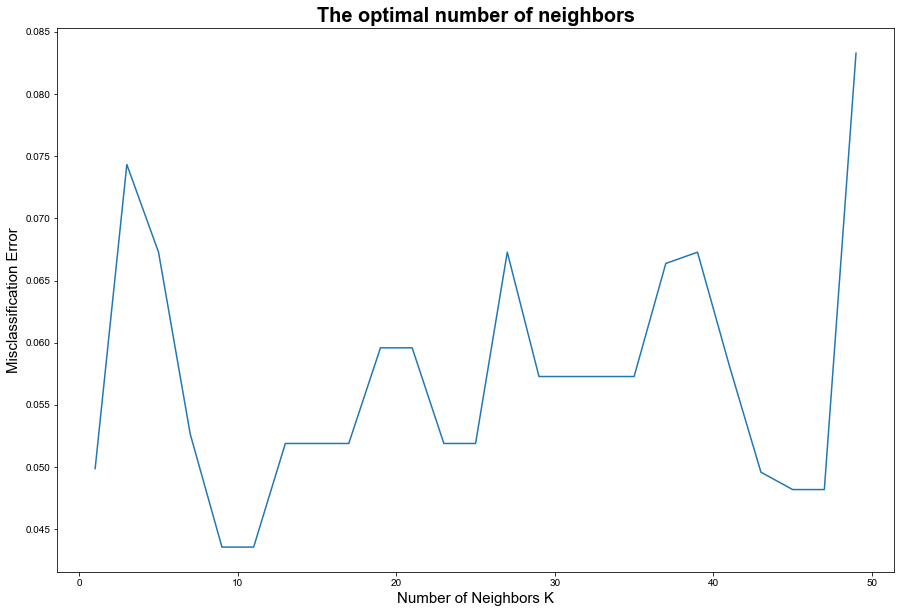

In [16]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [17]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


# Ensemble Learning

<img src='elephant.jpeg' width="900" height="900">
